In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import networkx as nx
import nxviz as nv # for vis

plt.style.use('ggplot')

## Getting Started

Fun Fact: This is taught by the Neurobiologist who invented nxviz: Eric Ma

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from(np.arange(1,7,1))

In [4]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [5]:
G.node

NodeView((1, 2, 3, 4, 5, 6))

In [6]:
#To just add one edge
G.add_edge(1,6)

#To add multiple edges at once
G.add_edges_from([(1,2), (1,3), (1,4), (1,5)])

In [7]:
G.add_edges_from([(2,4),(2,5),(2,6)])

In [8]:
G.edges()

EdgeView([(1, 6), (1, 2), (1, 3), (1, 4), (1, 5), (2, 4), (2, 5), (2, 6)])

## Metadata storage

In [9]:
G.node[1]['label'] = 'Blue'
G.node[2]['label'] = 'Red'

In [10]:
G.nodes(data=True) 

NodeDataView({1: {'label': 'Blue'}, 2: {'label': 'Red'}, 3: {}, 4: {}, 5: {}, 6: {}})

In [11]:
list(G.nodes(data=True))[2]

(3, {})

C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


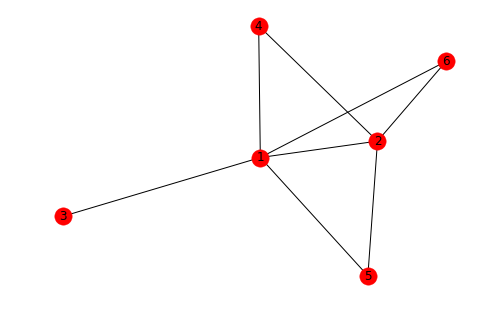

In [12]:
nx.draw(G, with_labels=True)
plt.show()

In [13]:
#If you need to find a specific node or edge, just convert to list and index it
list(G.edges(data=True))

[(1, 6, {}),
 (1, 2, {}),
 (1, 3, {}),
 (1, 4, {}),
 (1, 5, {}),
 (2, 4, {}),
 (2, 5, {}),
 (2, 6, {})]

In [14]:
# [i for i,j in G.nodes(data=True) if G['label'] == 'Red']

**Undirected** - no explicit direction 
   - ex: Facebook friends, line with no arrow.   
   
**Directed** - explicit direction 
   - ex: twitter - following one person, that person may not follow you.  

>- Graph - undirected graph **nx.Graph()**
>- MultiGraph - undirected graph with multiple edges **nx.MultiGraph()**
>- DiGraph - directed graph **nx.DiGraph()**
>- Multi(Di)Graph - directed graph with multiple edges between two nodes **nx.MultiDiGraph()**

**Djikstra's Algorithm** (d+ EYE+ k + struhh) - will be useful 

_Having lots of multiple edges can be memory intensive, so you can use weights with metadeta to indicate actual 
number of nodes_

**Self-Node Loops** - node is connected to itself 
  - ex. Bikeshare - route starts and ends at same point

**To set weight of edge**   
network_name.edges[node1, node2]['attribute'] = value

In [15]:
G.edges(data=True)

EdgeDataView([(1, 6, {}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (2, 4, {}), (2, 5, {}), (2, 6, {})])

In [16]:
#Can check to see how many selfloops exist (edges that begin and end on the same node)
G.number_of_selfloops()

0

## Different Visualization Options

1. Arc Plot - on one axis, use circular edges
2. Matrix Plot
3. Circos Plot - transformation of Arc plot, such that two ends are joined into circle 
4. Barbell Plot

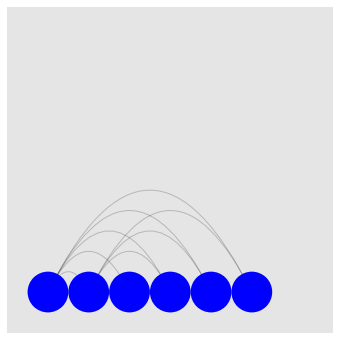

In [17]:
ap = nv.ArcPlot(G)
ap.draw()
plt.show()

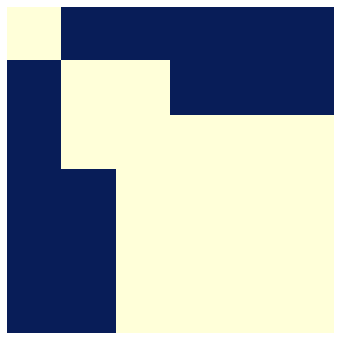

In [18]:
#Converts graph to a numpy matrix - each node is one column and one row
m = nv.MatrixPlot(G)
m.draw()
plt.show()

In [19]:
#This is what goes on under the hood of nv.MatrixPlot()
# When you do this ONLY WEIGHT METADATA PRESERVED, all other metadata is lost
N = nx.to_numpy_matrix(G)
N

matrix([[0., 1., 1., 1., 1., 1.],
        [1., 0., 0., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.]])

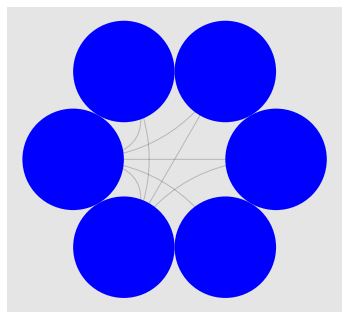

In [20]:
#Circos Plot -with arguments
C = nv.CircosPlot(G, node_color=None, node_order=None)
C.draw()
plt.show()

C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


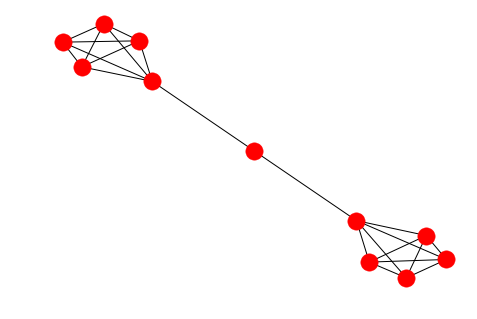

In [21]:
G = nx.barbell_graph(m1=5, m2=1) #m1 - number of nodes in bell, m2 - number of nodes in bridge
nx.draw(G)

## Conversion 

In [22]:
#Can convert back from numpy matrix to graph
G_conv = nx.from_numpy_matrix(N)
G_conv

In [23]:
list(G_conv)

[0, 1, 2, 3, 4, 5]

In [24]:
G_conv.nodes()

NodeView((0, 1, 2, 3, 4, 5))

In [25]:
# Default form is Graph() so have to use args to modify
G_di = nx.from_numpy_matrix(N, create_using=nx.DiGraph())
G_di

In [26]:
# Check that the `category` metadata field is lost from each node
for n,d in G_conv.nodes(data=True):
    assert 'label' not in d.keys()

## Centrality
#### **1. Degree** - number of neighbors a node has 
#### **2. Degree Centrality** - number of neighbors a node has / number of possible neighbors
   - with self-loops - total number is all plus my own node
   - whereas, with twitter - total number is every other node, excluding self
   
#### **3. Betweenness Centrality** - number of shortest paths through a node / all possible shortest paths 
   - captures bottleneck nodes rather than highly connected nodes
 

In [27]:
list(G.neighbors(1))

[0, 2, 3, 4]

In [28]:
list(G.neighbors(1))

[0, 2, 3, 4]

In [29]:
len(list(G.neighbors(2)))

4

In [30]:
#dictionary, key is node, and value is degree of centrality
nx.degree_centrality(G) 

{0: 0.4,
 1: 0.4,
 2: 0.4,
 3: 0.4,
 4: 0.5,
 6: 0.5,
 7: 0.4,
 8: 0.4,
 9: 0.4,
 10: 0.4,
 5: 0.2}

In [31]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 5))

In [32]:
len(list(G.neighbors(1)))

4

### 1. Degree Function

In [33]:
#A function to compute number of neighbors for each node in a graph

def node_neighbors(g, m):
    ''' 
    Returns all nodes in Graph that have m neighbors
    '''
    nodes = set()
    
    for n in g.nodes():
        if len(list(g.neighbors(n))) == m:
            nodes.add(n)
    
    return nodes

In [34]:
five_neighbors = node_neighbors(G,5)
print(five_neighbors)

{4, 6}


In [35]:
#Practicing basic list comprehension
[n for n in G.nodes()]

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 5]

In [36]:
#To get degree of every single node - yay list comprehensions!
# Node 1 has 5 neighbors, Node 2 has 4 neighbors, etc.

n_nodes = [len(list(G.neighbors(n))) for n in G.nodes()]

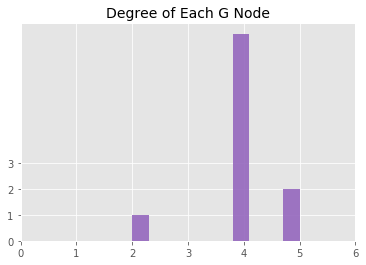

In [37]:
#Practicing OOP way of building matplotlib graph

fig, ax = plt.subplots(figsize=(6,4))

ax.hist(x=n_nodes, color='tab:purple', alpha=.9)
ax.set_title('Degree of Each G Node', size=14)
ax.set_xlim(0,6)
ax.set_xticks(np.arange(0,7,1))
ax.set_yticks(np.arange(0,4,1))

plt.show()

### 2. Degree Centrality Function

In [38]:
# Function that finds and returns nodes with highest degrees of centrality 

def highest_degree_centrality(graph):
    
    degree_centrality = nx.degree_centrality(graph)
    
    max_dc = max(list(degree_centrality.values()))
    
    nodes = set()
    
    for k,v in degree_centrality.items():
        
        if v == max_dc:
            nodes.add(k)
            
    return nodes

top_dc = highest_degree_centrality(G)
top_dc

{4, 6}

In [39]:
for node in top_dc:
    assert nx.degree_centrality(G)[node] == max(nx.degree_centrality(G).values())

### 3. Betweenness Centrality Function

In [40]:
# Function that finds and returns nodes with highest betweenness centrality

def highest_betweenness_centrality(graph):
    
    between_centrality = nx.betweenness_centrality(graph)
    
    max_bc = max(list(between_centrality.values()))
    
    nodes = set()
    
    for k,v in between_centrality.items():
        
        if v == max_bc:
            nodes.add(k)
            
    return nodes

top_bc = highest_betweenness_centrality(G)
top_bc

{5}

In [41]:
for node in top_bc: 
    assert nx.betweenness_centrality(G)[node] == max(nx.betweenness_centrality(G).values())

## Graph Algorithms / Finding Paths


### **Breadth-First Search (BFS)**
   - developed in 1950s 
   - shortest way out of a maze
   - ask for neighbors, ask if end node is in neighbors
   - if not, ask for neighbors of neighbors, etc.
   
   This looks like Bread First Search or Breakfast Search lol
   
   <img src=https://www.pngkit.com/png/detail/150-1502067_meme-dankmeme-dankmemes-memes-bread-ohfreetoedit-evil-seed.png
    width=300 height=300 align='left'/>
   
    

### BFS Algorithm Function

In [56]:
def path_exists(graph, node1, node2):
    """
    This function checks whether a path between two nodes exists in the graph
    """
    visited_nodes = set()
    
    queue = [node1]
    
    for node in queue:
        neighbors = graph.neighbors(node)
        
        if node2 in neighbors: 
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
            
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
            
        if node == queue[-1]:
            print('No path exists : (')
            return False

In [57]:
path_exists(G,5,6)

Path exists between nodes 5 and 6


True

In [58]:
path_exists(G,1,5)

No path exists : (


False

### **All Shortest Paths** 
- set of paths such that each path is the shortest path between a given pair of nodes, done for all pairs of nodes

In [59]:
G = nx.barbell_graph(m1=5, m2=1) #m1 - number of nodes in bell, m2 - number of nodes in bridgE

C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


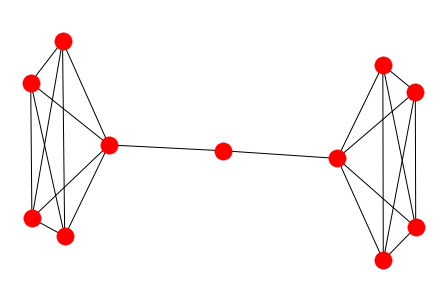

In [60]:
nx.draw(G)
#Shows that only the bridge node and adjacent node on each side [4,5,6]
# nodes within each end are fully connected with one another -